# Linear and Non-Linear inductors
Author : **Ali Houshyar**

# Linear Inductors:
Linear inductors have a constant inductance value regardless of the current or frequency applied to them. 

## Time-variant and Time-invariant Linear Inductors : 
Linear induct ors can be classified into Time-variant and Time-invariant types based on how their Key Characteristics changes by time.

### Time-invariant Inductors:

By definition, characteristic curve of a time-invariant inductor have a relationship that can be expressed as :

$ Φ = Li(t) $

The voltage-current (V-I) relationship for a linear inductor follows the equation:

$ V = L\frac{di}{dt} $


where :


-	V is the voltage across the inductor.
-	I is the current through the inductor.
-	L is the inductance.
-	$ \frac{di}{dt} $ is the rate of change of current.

In a graph of voltage versus the rate of change of current, linear inductors produce a straight line with a slope equal to the inductance.

If Integrate both sides over $[0,t]$ interval : 

$ i(t) = i(0) + \frac{1}{L}\int_0^t v(t')dt' $ 

The integral in the above equation is the area under the curve . it is clear that i(t) is depends on i(0) and all Values of voltage over $[0,t]$ interval. Whis this we can assum that “inductors have memory” like capacitors.

we define a time-invariant inductor as a circuit element with two parameter :

- $i(0)$ : the current of inductor in $t=0$
- L : the inductance

#### Tip 1 :

if we have time-invariant inductor with inductance of L and $i(0) = I_0$ then we can change the circuit into independent current sources with $I = I_0$ and a time-invariant inductor with inductance of L and $i(0) = 0$ which are parallel to each other.

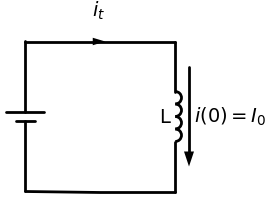

In [2]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d+=elm.Line().right()
    d+=elm.Arrowhead().at([1.6,0.0]).linewidth(4.0).label("$ i_t $")
    inc = elm.Inductor().down().label("L")
    d+=elm.Line().left()
    d+=elm.BatteryCell().up().reverse()
    d+=elm.CurrentLabel().at(inc).label("$i(0) = I_0$")

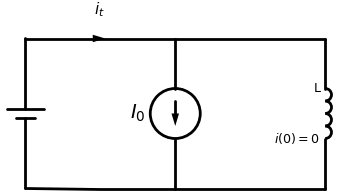

In [3]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d+=elm.Line().right()
    d+=elm.Arrowhead().at([1.6,0.0]).linewidth(4.0).label("$ i_t $",fontsize=11.1)
    Isrc=elm.SourceI().down().label("$I_0$")
    d+=elm.Line().right().at(Isrc.start)
    d+=elm.Inductor().down().label(["L","$i(0) = 0$"],fontsize=9.1)
    d+=elm.Line().left()
    d+=elm.Line().left()
    d+=elm.BatteryCell().up().reverse()

#### Tip 2:




If for all $t$ over the $[0,t]$ interval, The voltage on both sides of the inductor is bounded then current over the $[0,t]$ interval is continuous function. This means if voltage stay bounded on both side of inductor, current can’t jump from a value to other incidentally.

#### Linear inductors characteristic curve

We will use a simple circuit to analysis the linear inductor and define their characteristic curve using PySpice :

Two array named "voltage" and "current" will keep our values during the simulations. Then we have a for loop that goes from 0 to 5.1 with step of 0.1. in each loop we create a new simple circuit with source, resistor and inductor and run the simulation and append the values into the aaray that we defined. at the end, we show the curve using matplotlip.

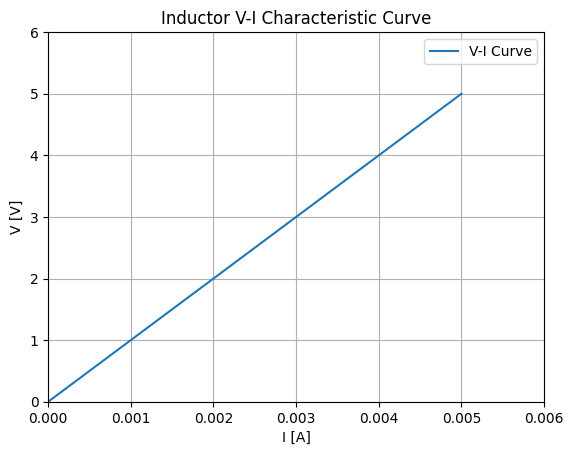

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PySpice
from PySpice.Spice.Netlist import Circuit

voltage = []
current = []
time_step = 1e-3 
stop_time = 0.5 
for v in np.arange(0, 5.1, 0.1):
    circuit = Circuit(f'circuit {v}')
    circuit.L(1, 'input', 'out', 10e-3)
    circuit.R(1, 'out', '0', 1e3)
    circuit.V(f'V{int(v*10)}', 'input', '0', v)
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=time_step, end_time=stop_time)
    sv = np.mean(analysis['out'][-int(0.1/time_step):])
    sc = sv / 1000
    voltage.append(v)
    current.append(sc)
plt.figure()
plt.plot(current, voltage, label='V-I Curve')
plt.title('Inductor V-I Characteristic Curve')
plt.xlabel('I [A]')
plt.ylabel('V [V]')
plt.grid()
plt.legend()
plt.xlim(0, 0.006)
plt.ylim(0, 6)
plt.show()


### Time-variant Inductors:


If inductor is linear but changes by time , characteristic curve of it in every second is straight line that passes from the origin and it slope is function of time

$ Φ = L(t)i(t) $

where $L(i)$ is specific function of time. With derivation of above equation we reach voltage equation that is : 


$ V(T) = L(t)\frac{di}{dt}\ + i(t)\frac{dL}{dt} $

# Non-Linear Inductors:


Non-linear inductors have an inductance that changes with the applied current or frequency. The V-I relationship for non-linear inductors does not follow a straight line, meaning the inductance varies under different conditions
In real word most of inductors are non-linear and we can model them to Time-invariant inductor only in specific period of time.
In this kind of inductors , In high current amount , The electric flux is saturated . that means when current raise to high value, electric flux 
Have very little changes.


Examples of non-linear inductors include:



-	**Ferrite Core Inductors**: Inductance changes with the level of current due to the magnetic properties of the ferrite core.
-	**Saturable Reactors**: Inductance decreases as the core material saturates with high levels of current, used in voltage regulation and power control.